In [7]:
import numpy as np
import scipy.stats as ss
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from feature_engine.outliers import OutlierTrimmer,ArbitraryOutlierCapper,Winsorizer

## Working with Outliers
An outlier is a data point that is significantly different from the remaining data. Statistical parameters
such as the mean and variance are sensitive to outliers. Outliers may also affect the performance of some
machine learning models, such as linear regression or AdaBoost. Therefore, we may want to remove or engineer
the outliers in the variables of our dataset.

In [2]:
from sklearn.datasets import load_boston
data_set = load_boston()

In [4]:
data = pd.DataFrame(data_set['data'],columns=data_set['feature_names'])
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## Trimming outliers from the dataset
Trimming, or truncating, is the process of removing observations that show outliers in one or more variables in the
dataset. There are three commonly used methods to set the boundaries beyond which a value can be considered an outlier.
If the variable is normally distributed, the boundaries are given by the mean plus or minus three times the standard
deviation, as approximately 99% of the data will be distributed between those limits. For normally, as well as not
normally, distributed variables, we can determine the limits using the inter-quartile range proximity rules or by
directly setting the limits to the 5th and 95th quantiles.

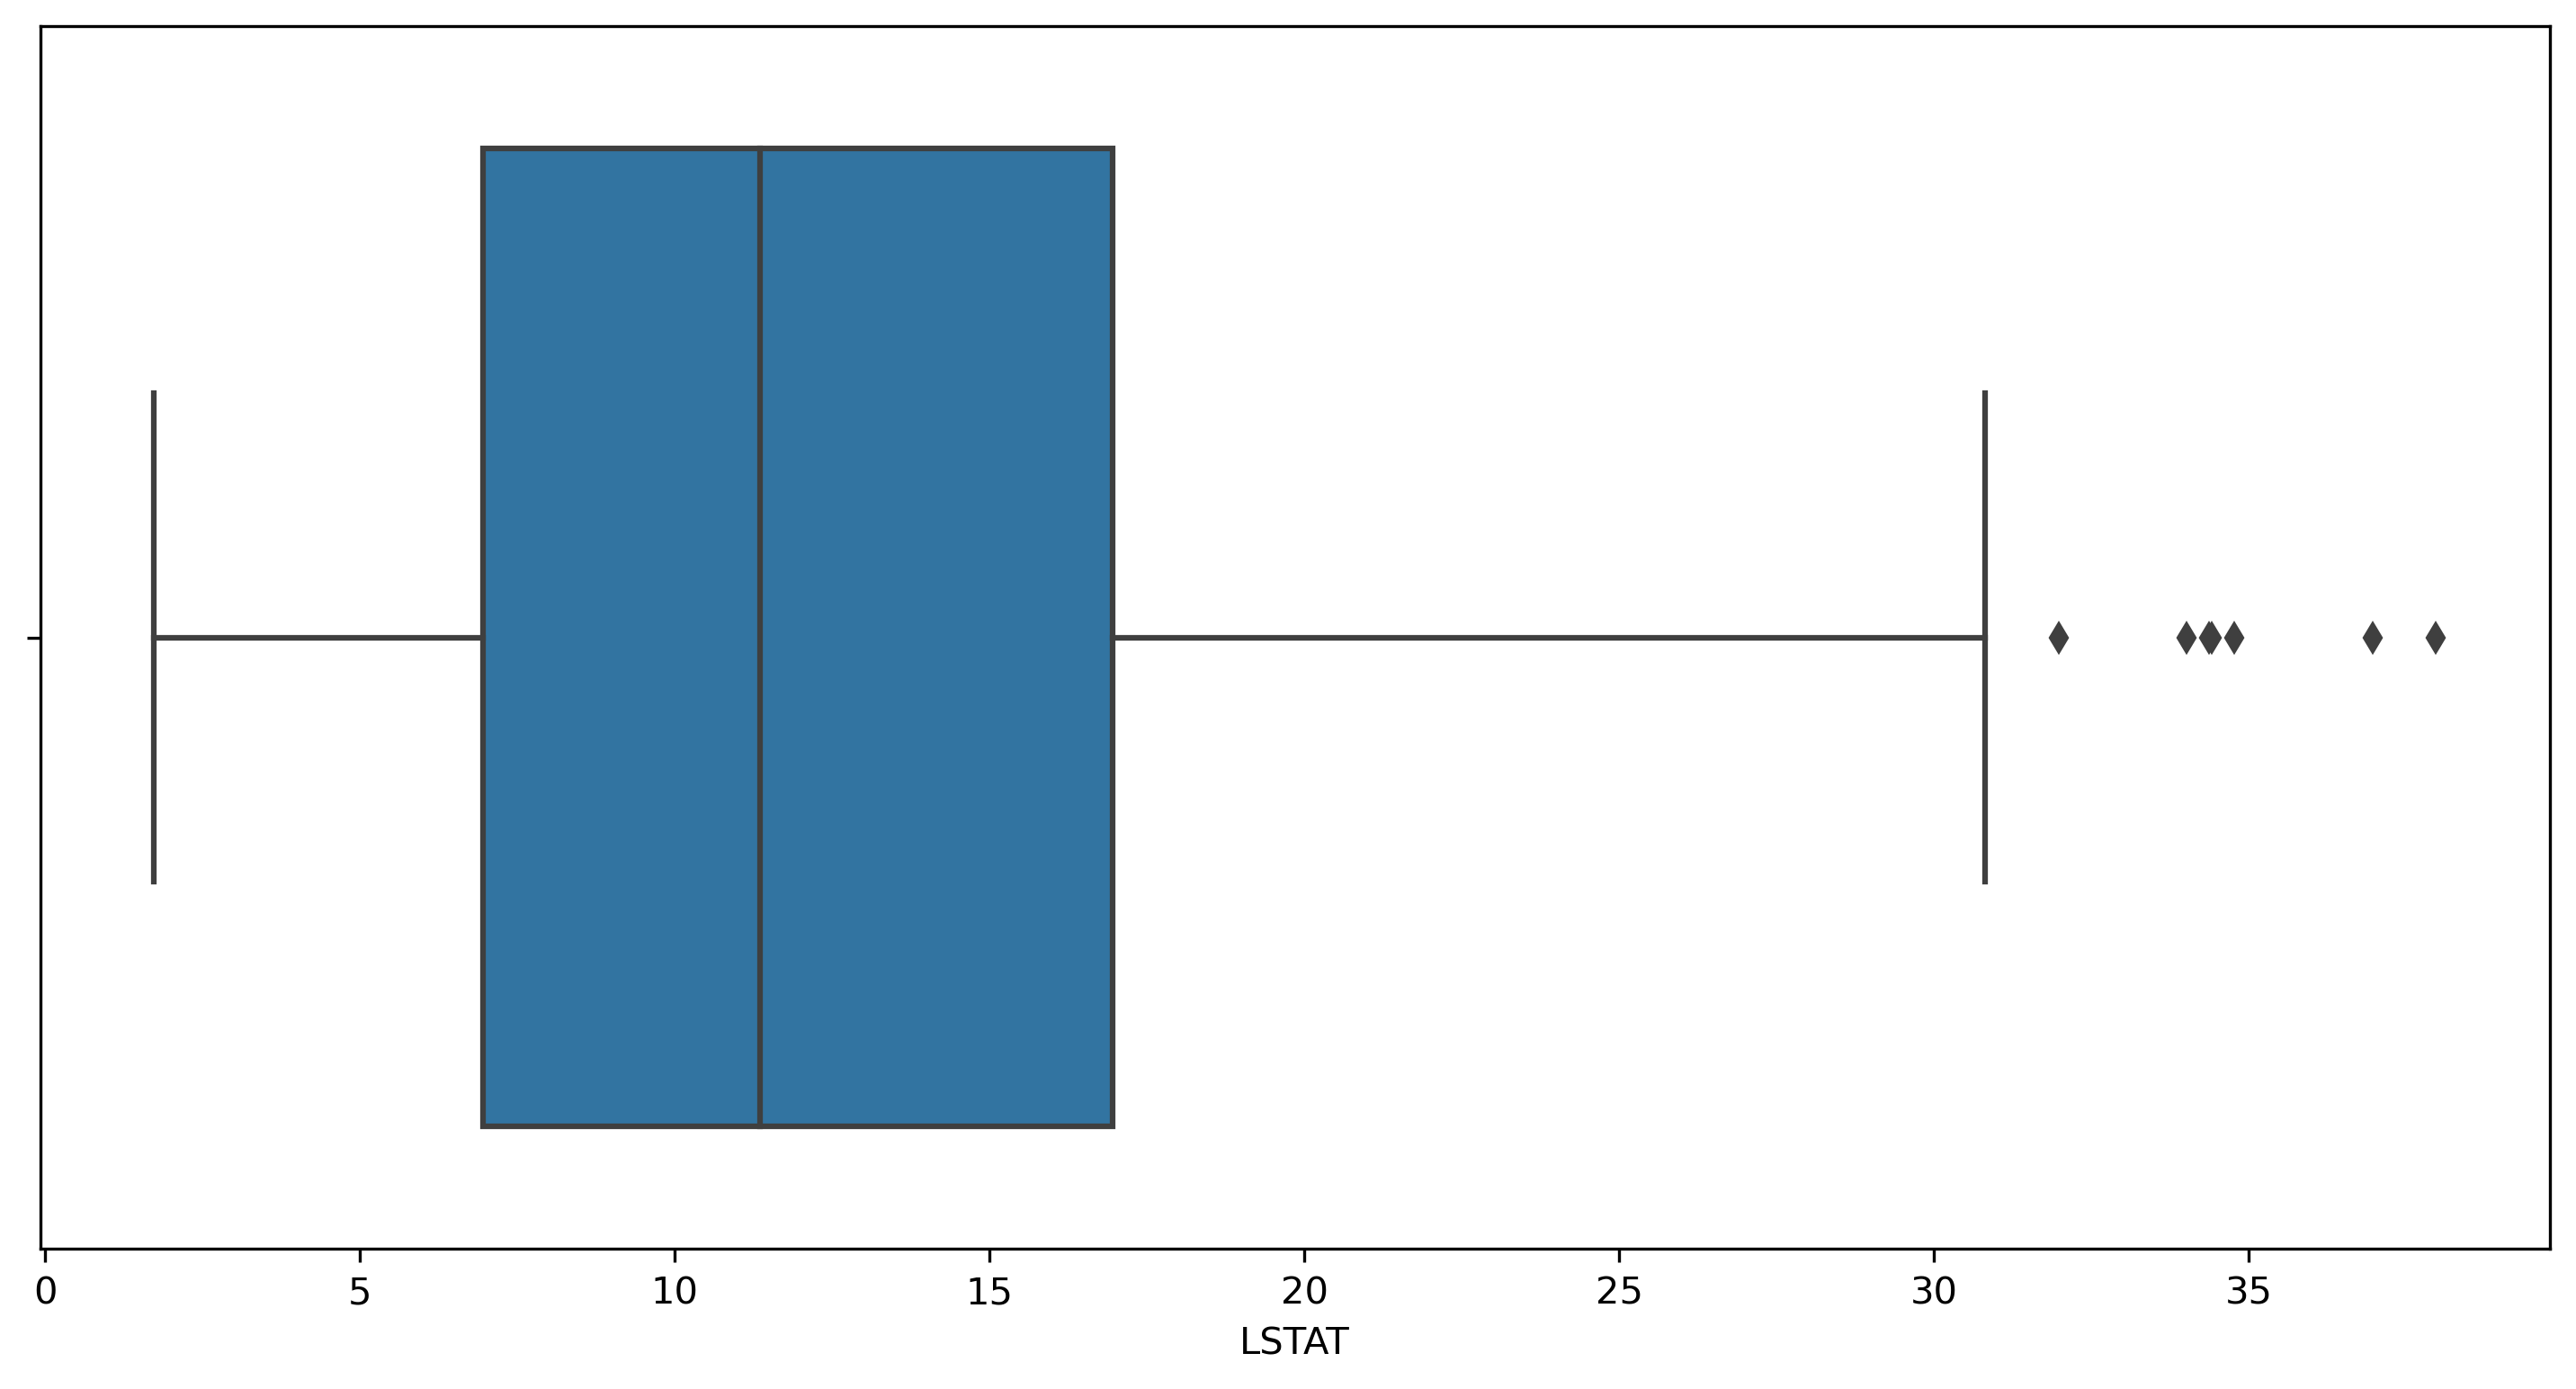

In [5]:
plt.figure(figsize=[12,6],dpi=300)
sns.boxplot(x=data.LSTAT)
plt.show()

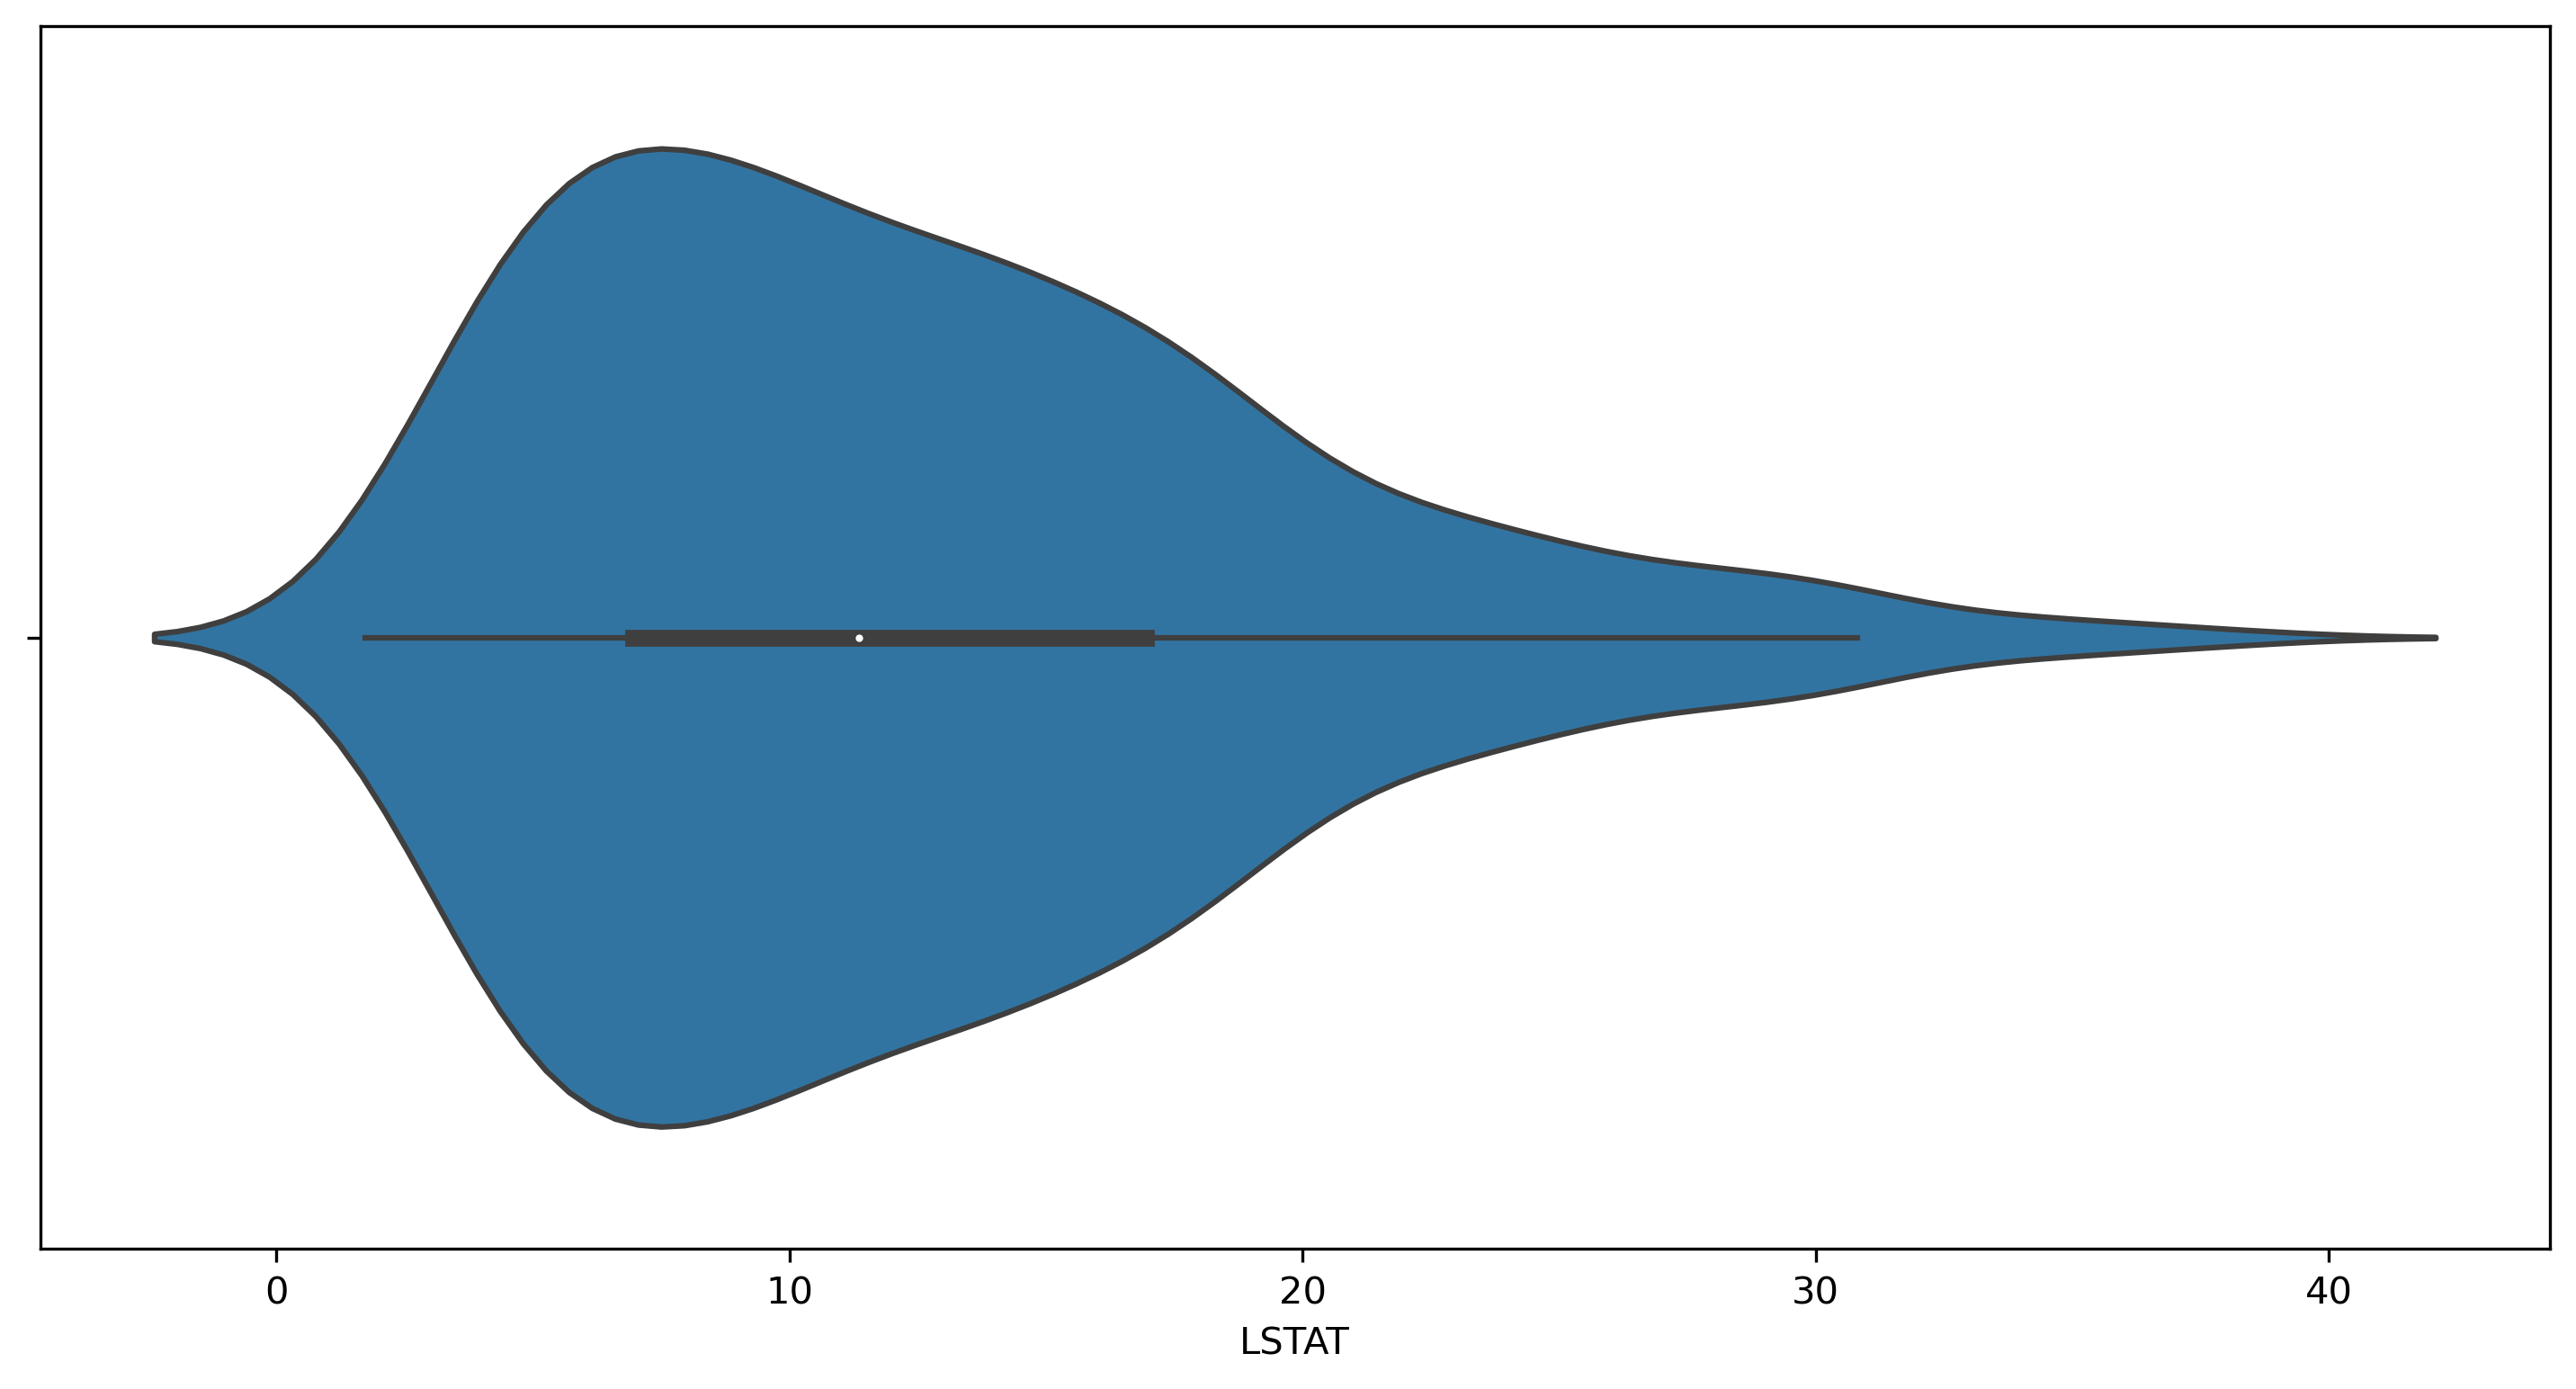

In [6]:
plt.figure(figsize=[12,6],dpi=300)
sns.violinplot(x=data.LSTAT)
plt.show()

In [9]:
iqr = ss.iqr(data.LSTAT)
upper_limit = np.quantile(data.LSTAT,0.75) + 1.5*iqr
lower_limit = np.quantile(data.LSTAT,0.25) - 1.5*iqr
lower_limit,iqr,upper_limit

(-8.057500000000005, 10.005000000000003, 31.962500000000006)

In [12]:
outlier_flag = data[(data['LSTAT']<lower_limit) | (data['LSTAT']>upper_limit)].index
outlier_flag

Int64Index([141, 373, 374, 387, 412, 414, 438], dtype='int64')

In [13]:
data.drop(outlier_flag,axis=0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


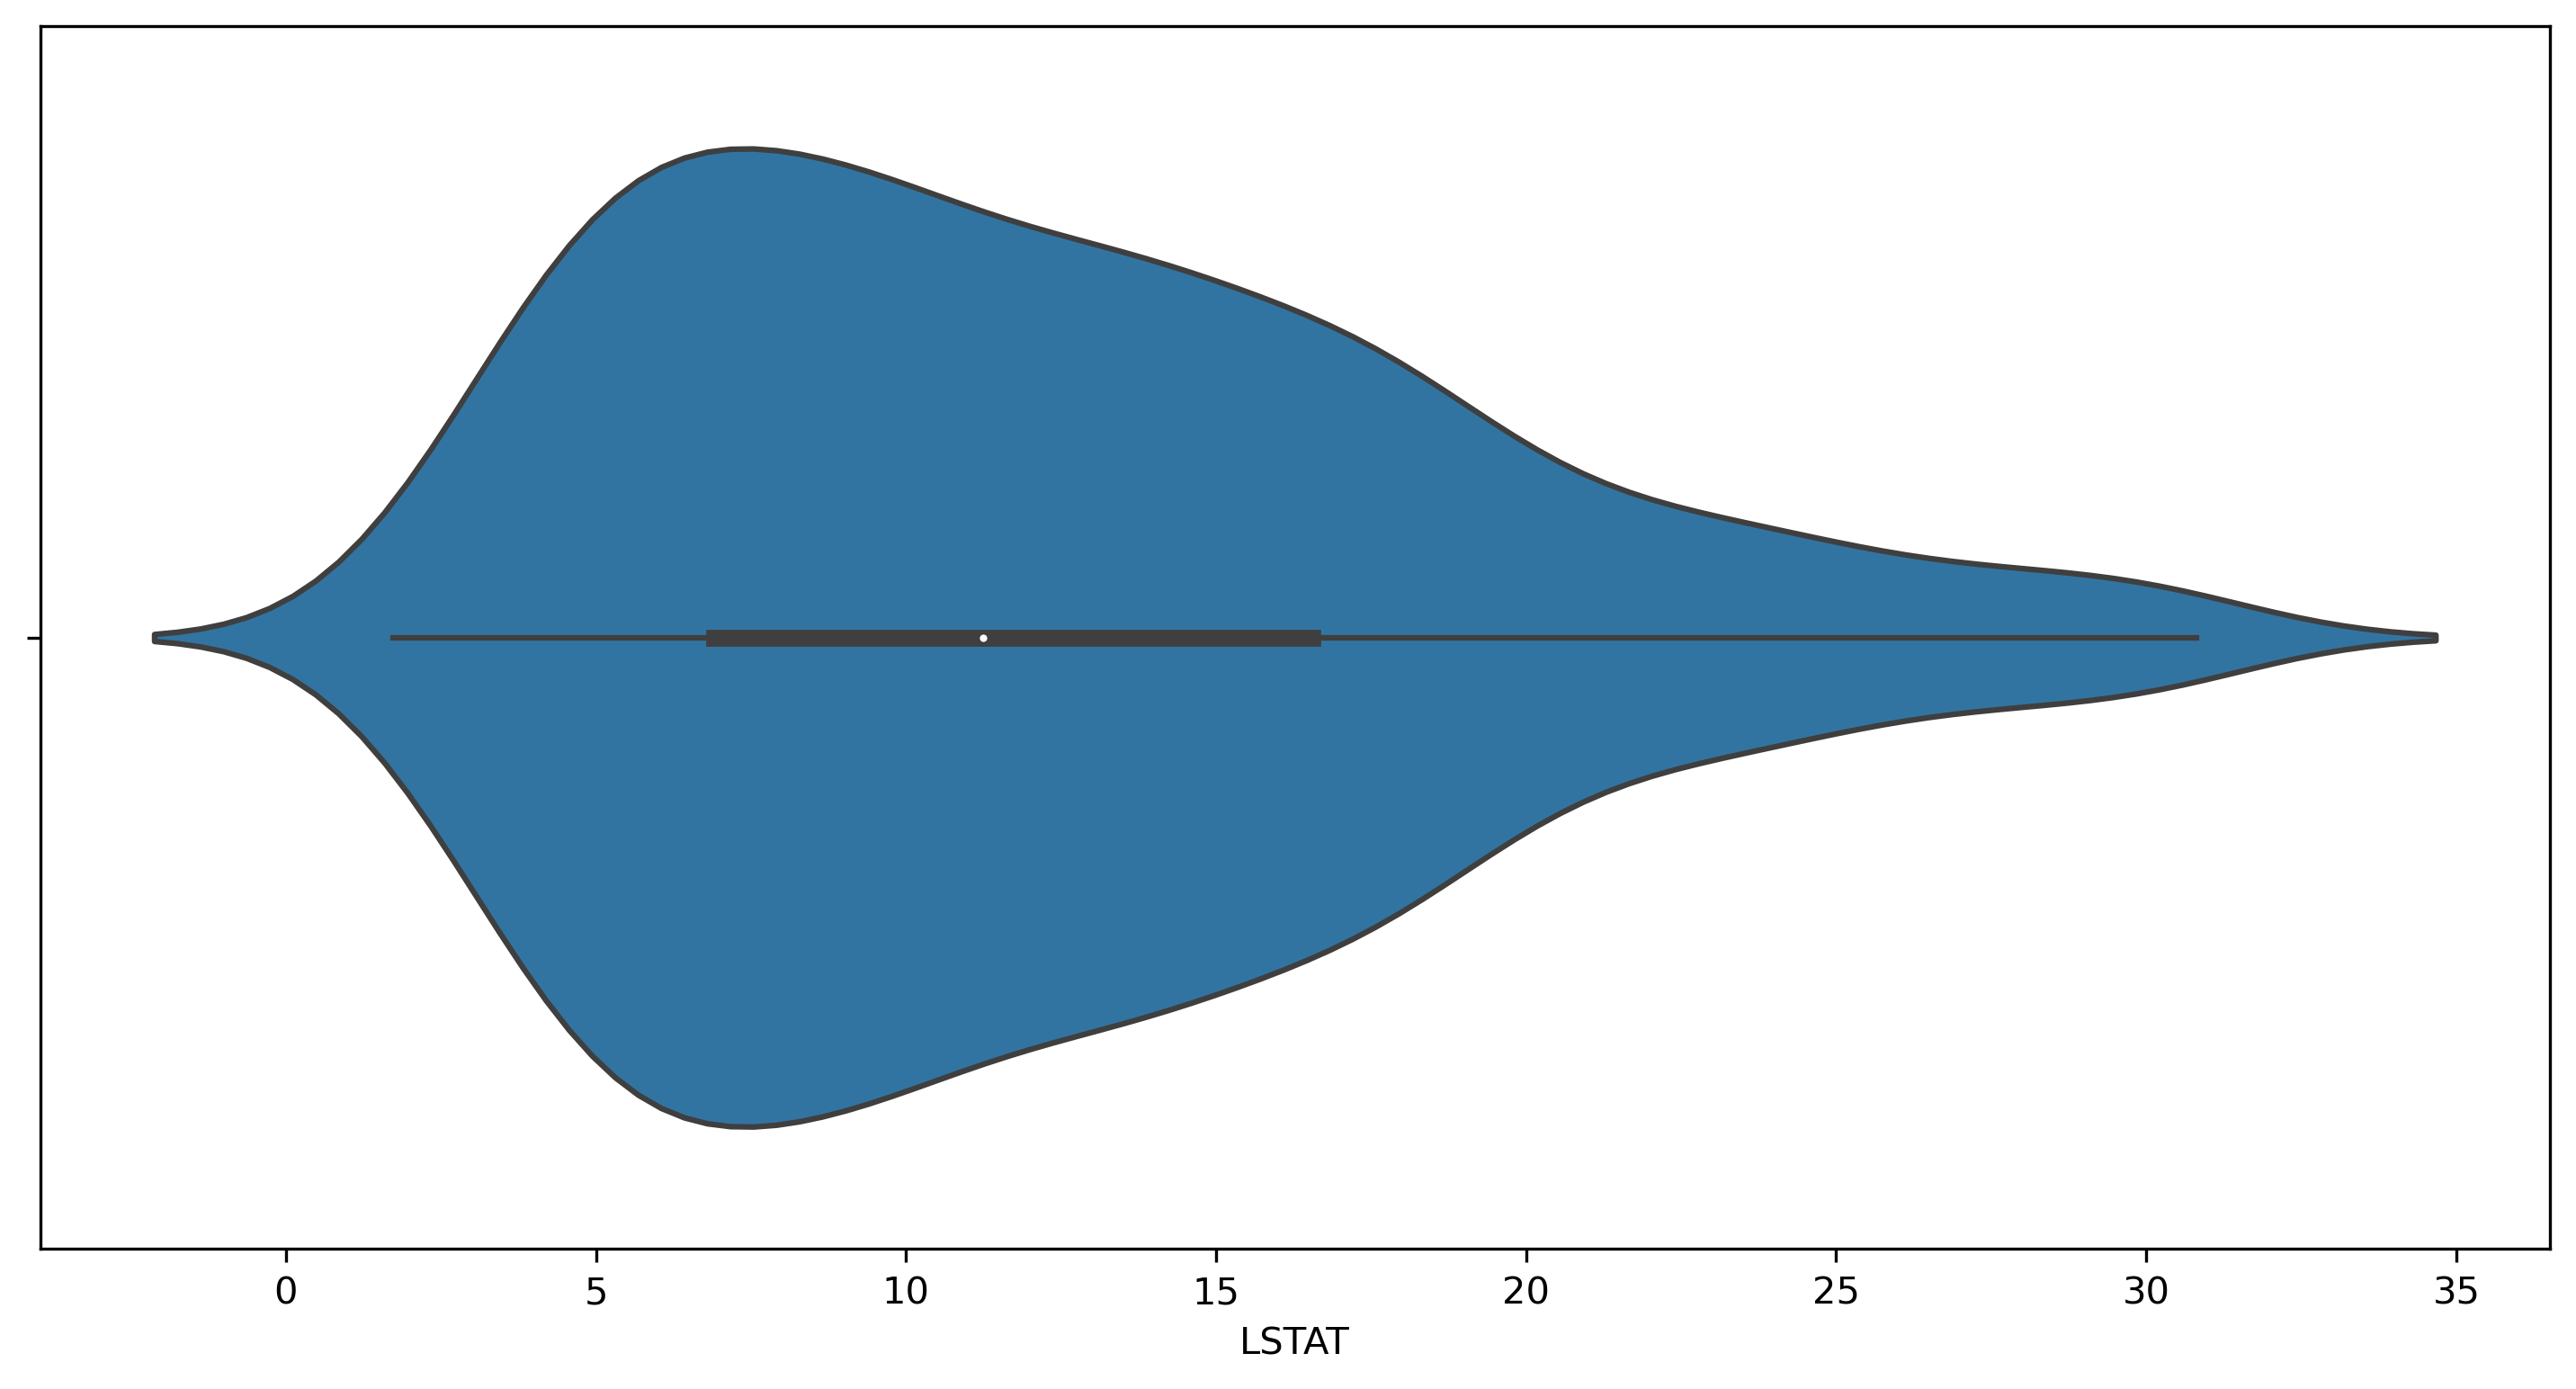

In [19]:
plt.figure(figsize=[12,6],dpi=300)
sns.violinplot(x=data.drop(outlier_flag,axis=0).LSTAT)
plt.show()

## Performing winsorization
Winsorization, or winsorizing, is the process of transforming the data by limiting the extreme values, that is, the
outliers, to a certain arbitrary value, closer to the mean of the distribution. Winsorizing is different from trimming
because the extreme values are not removed, but are instead replaced by other values. A typical strategy involves
setting outliers to a specified percentile. For example, with 90% winsorization, we set all data below the 5th percentile
to the value at the 5th percentile and all data above the 95th percentile to the value at the 95th percentile.
Winsorization is symmetric; therefore, the winsorized mean of a symmetric distribution provides an unbiased
representation of the distribution of the variable.

In [17]:
windsorizer = Winsorizer(capping_method='quantiles',tail='both',variables=['LSTAT'],fold=0.2)
windsorizer.fit(data)
windsorizer.left_tail_caps_,windsorizer.right_tail_caps_

({'LSTAT': 6.29}, {'LSTAT': 18.06})

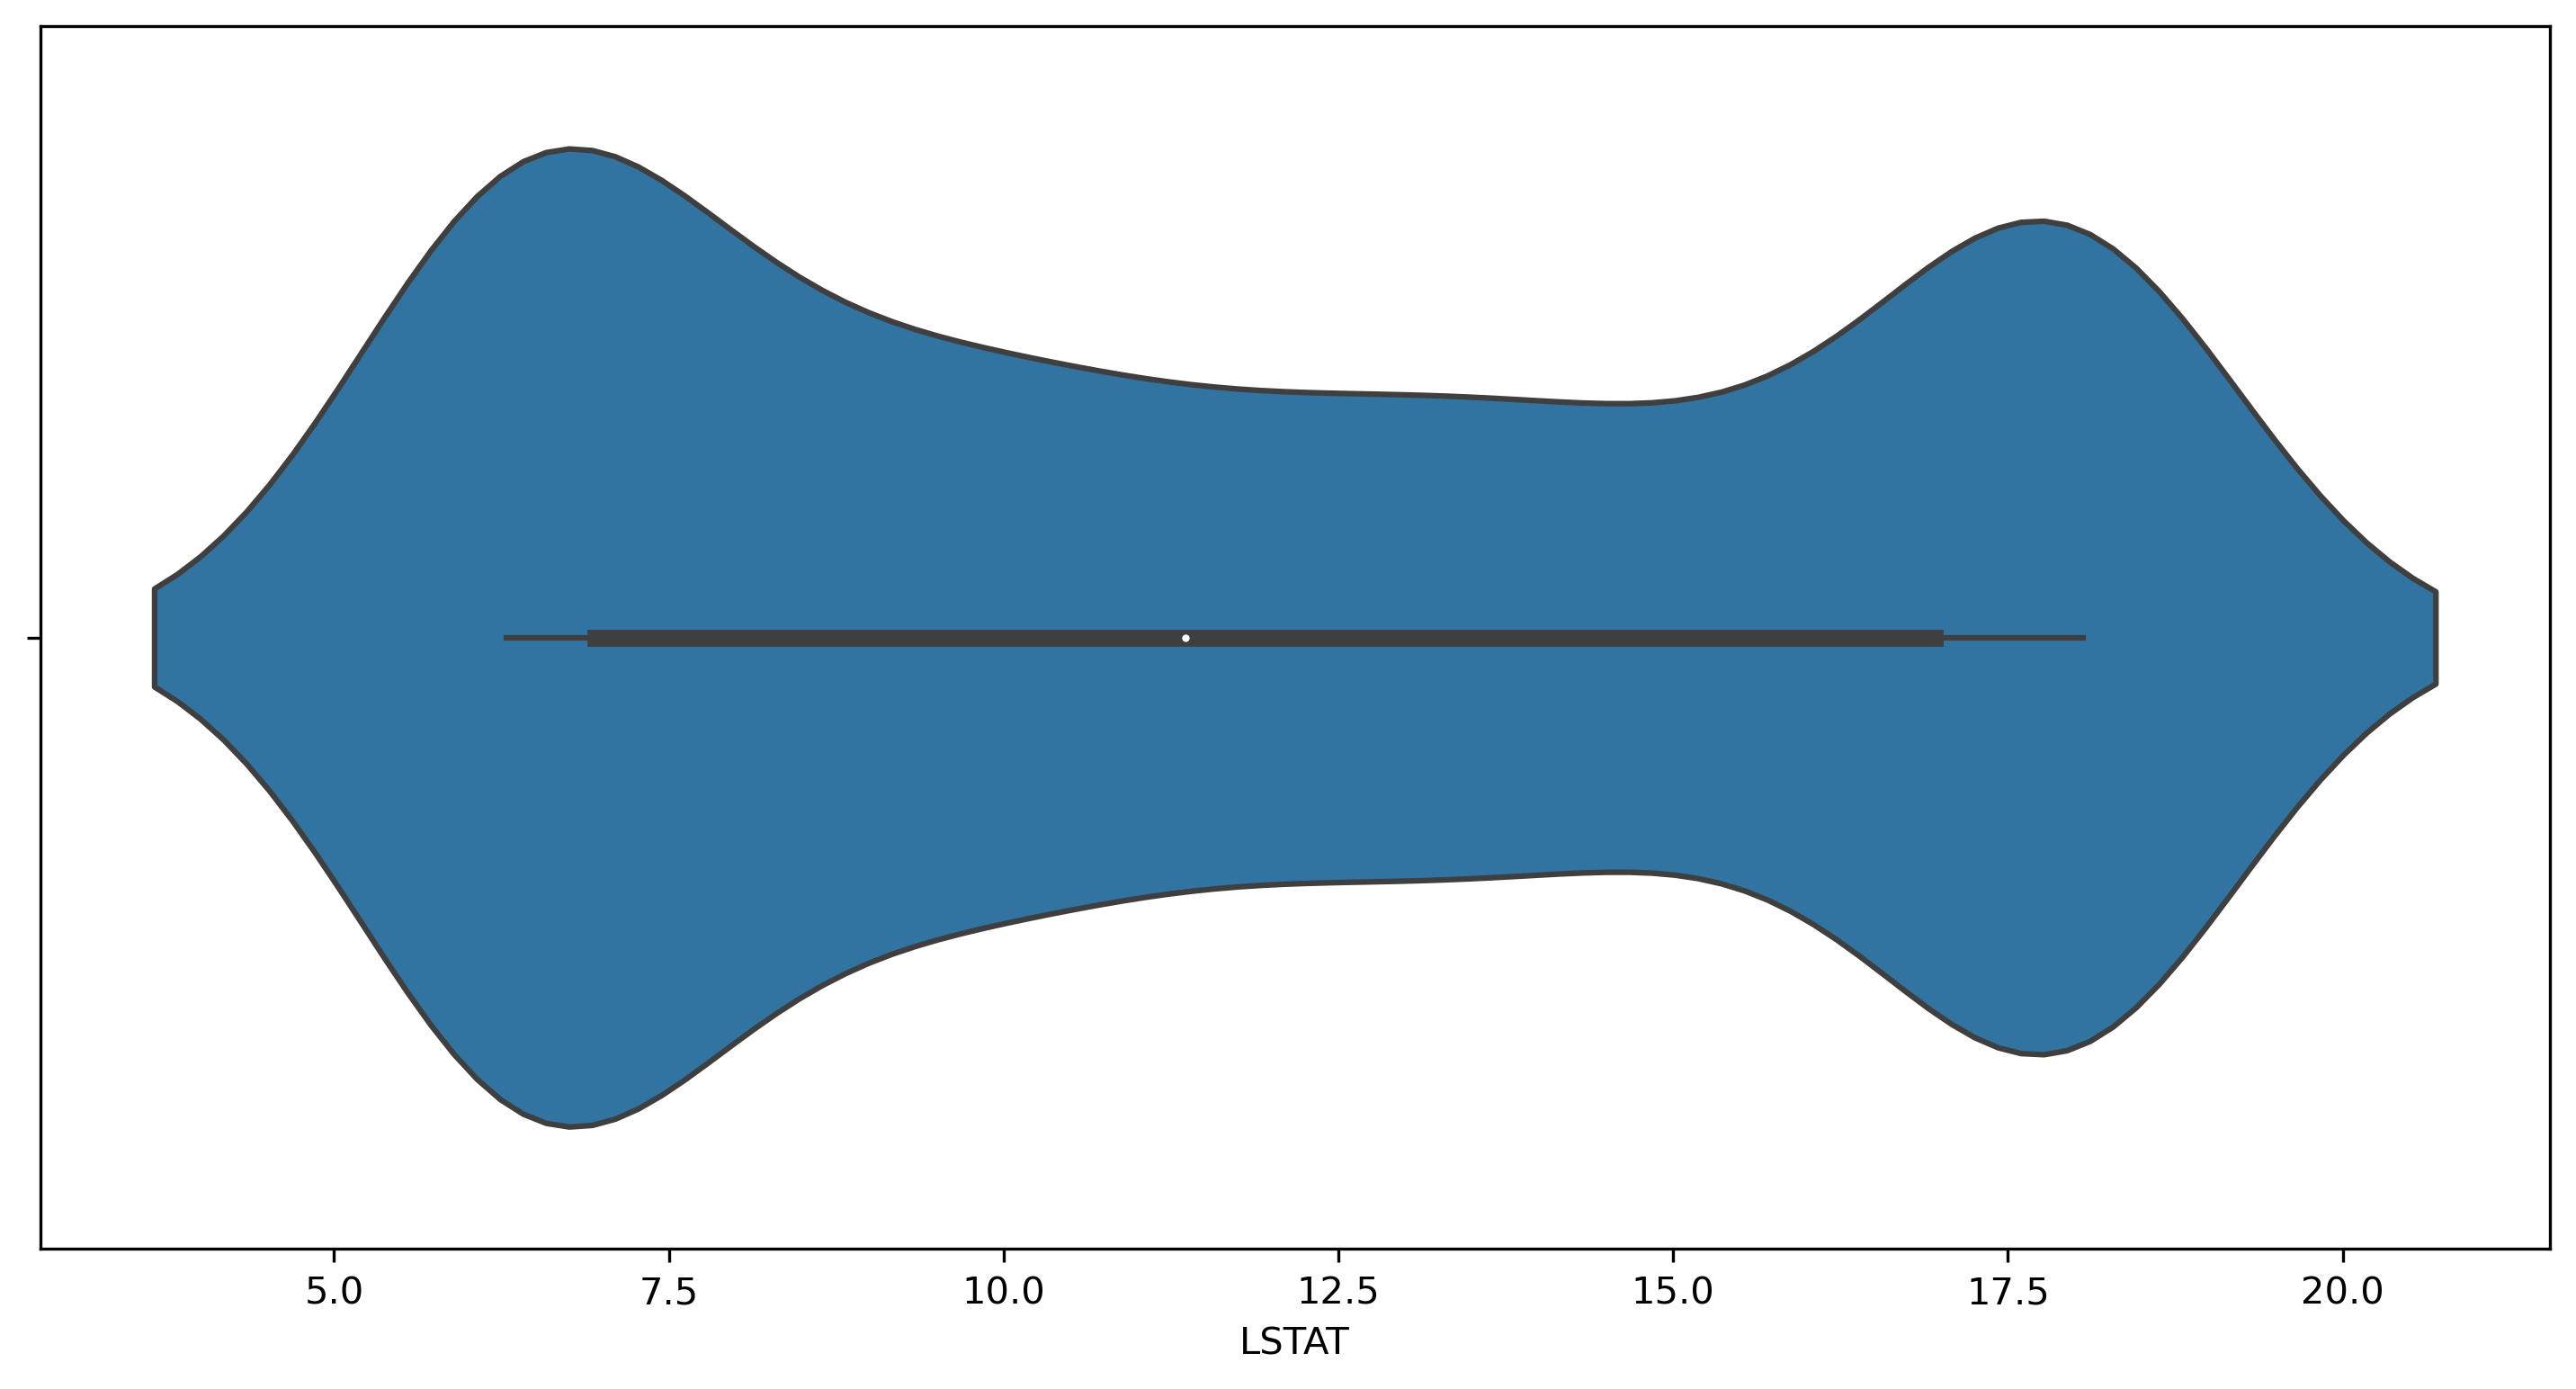

In [20]:
plt.figure(figsize=[12,6],dpi=300)
sns.violinplot(x=windsorizer.transform(data).LSTAT)
plt.show()

## Capping the variable at arbitrary maximum and minimum values
Similarly to winsorization, we can replace the extreme values by values closer to other values in the variable, by
determining the maximum and minimum boundaries with the mean plus or minus the standard deviation, or the inter-quartile
range proximity rule. This procedure is also called bottom and top coding, censoring, or capping. We can cap both extremes
of the distribution or just one of the tails, depending on where we find the outliers in the variable.

In [21]:
windsorizer = Winsorizer(capping_method='gaussian',tail='both',fold=3,variables=['LSTAT'])
windsorizer.fit(data)
windsorizer.left_tail_caps_,windsorizer.right_tail_caps_

({'LSTAT': -8.770121292938992}, {'LSTAT': 34.07624777515244})

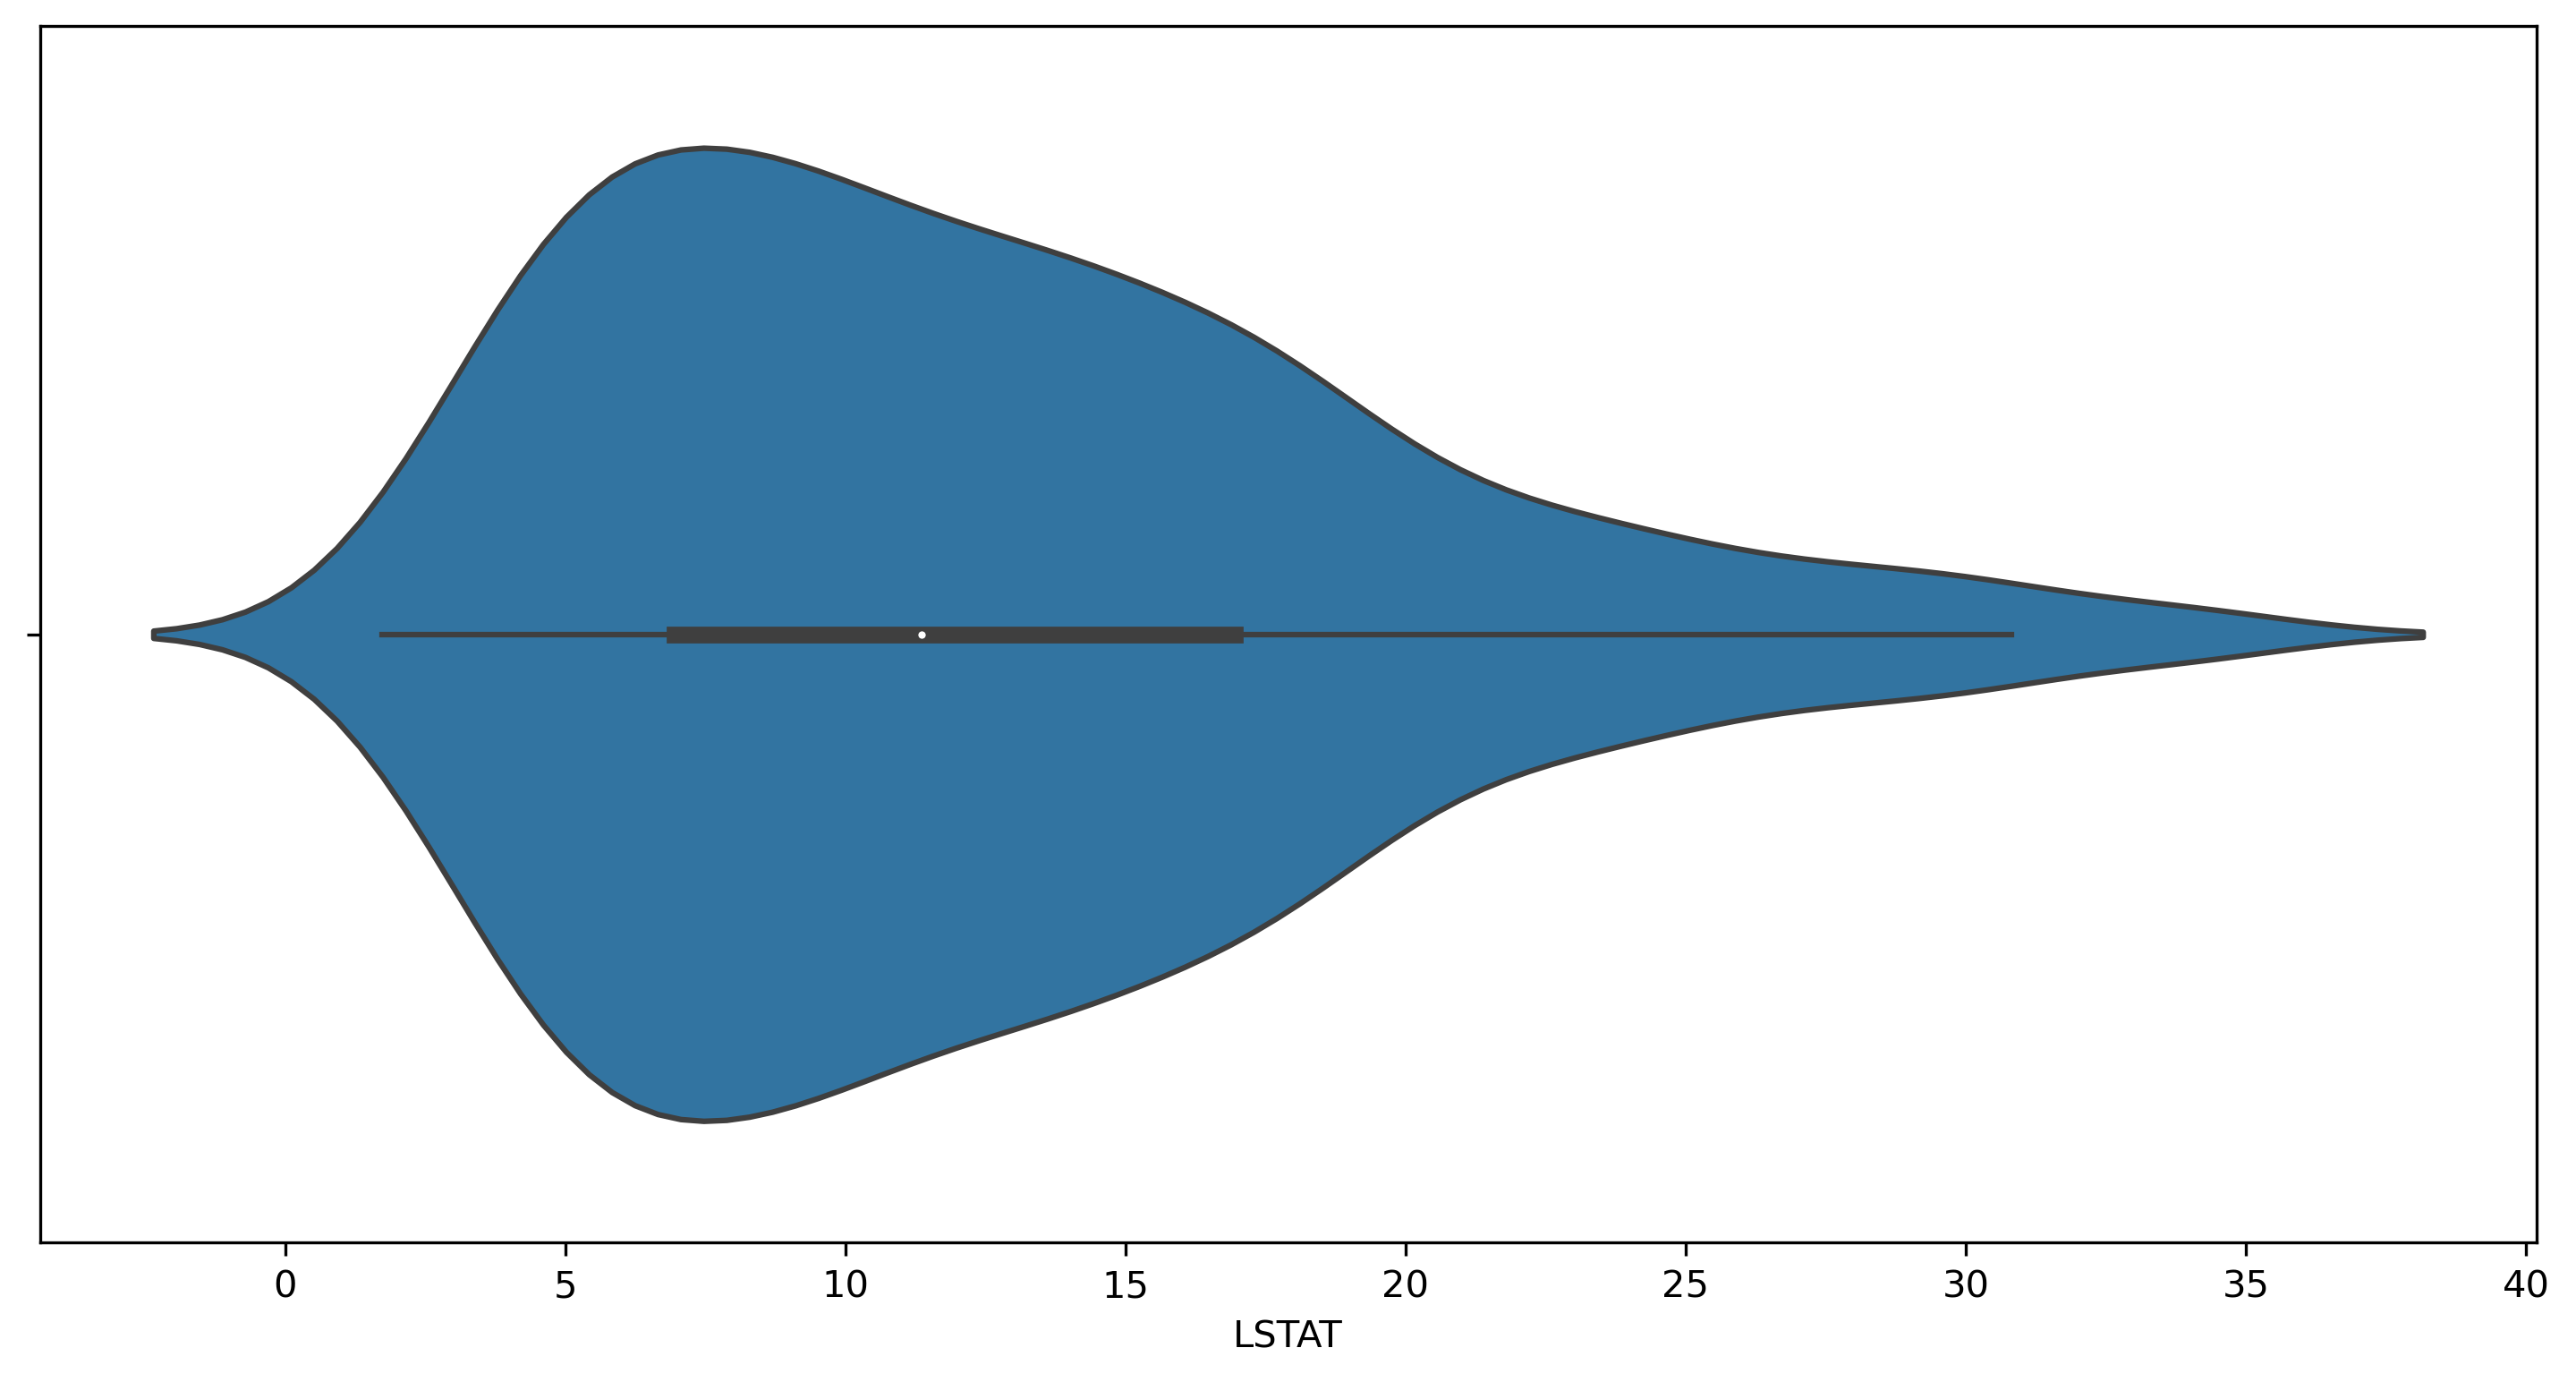

In [22]:
plt.figure(figsize=[12,6],dpi=300)
sns.violinplot(x=windsorizer.transform(data).LSTAT)
plt.show()